<a href="https://colab.research.google.com/github/FranziskoB/Regressao_simples_multipla/blob/main/08_Regressao_nao_linear_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RREGRESSÃO NÃO LINEAR MÚLTIPLA COM DUMMIES

#Importação das bibliotecas

In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

## Importando os dados

In [2]:
df_planosaude = pd.read_csv('https://raw.githubusercontent.com/FranziskoB/Regressao_simples_multipla/main/dados/planosaude.csv', delimiter=',')
df_planosaude.head()

,id,despmed,idade,dcron,renda,plano
0,1,206.84,57,5,57.200001,bronze
1,2,184.19,67,4,67.199997,bronze
2,3,175.68,62,4,62.000000,bronze
3,4,180.04,67,5,67.199997,bronze
4,5,218.86,68,5,68.000000,bronze


Características das variáveis do dataset

In [3]:
df_planosaude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    int64  
 1   despmed  200 non-null    float64
 2   idade    200 non-null    int64  
 3   dcron    200 non-null    int64  
 4   renda    200 non-null    float64
 5   plano    200 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


Estatísticas univariadas

In [4]:
df_planosaude.describe()

,id,despmed,idade,dcron,renda
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,161.183400,50.010000,2.705000,50.022000
std,57.879185,42.447084,12.547794,1.670908,12.626538
min,1.000000,88.730000,32.000000,0.000000,31.600000
25%,50.750000,126.140000,38.000000,1.000000,38.000000
50%,100.500000,155.000000,49.000000,2.000000,48.799999
75%,150.250000,197.622500,63.000000,4.000000,63.200001
max,200.000000,269.200000,68.000000,5.000000,68.000000


Transformação da variável 'plano' para o tipo categórico

In [6]:
df_planosaude['plano'] = df_planosaude['plano'].astype('category')
df_planosaude['plano'].head()

0    bronze
1    bronze
2    bronze
3    bronze
4    bronze
Name: plano, dtype: category
Categories (3, object): ['bronze', 'esmeralda', 'ouro']

Tabela de frequências absolutas da variável 'plano'

In [7]:
df_planosaude['plano'].value_counts()

bronze       72
esmeralda    66
ouro         62
Name: plano, dtype: int64

Distribuições das variáveis, scatters, valores das correlações e suas
respectivas significâncias

<Figure size 1080x720 with 0 Axes>

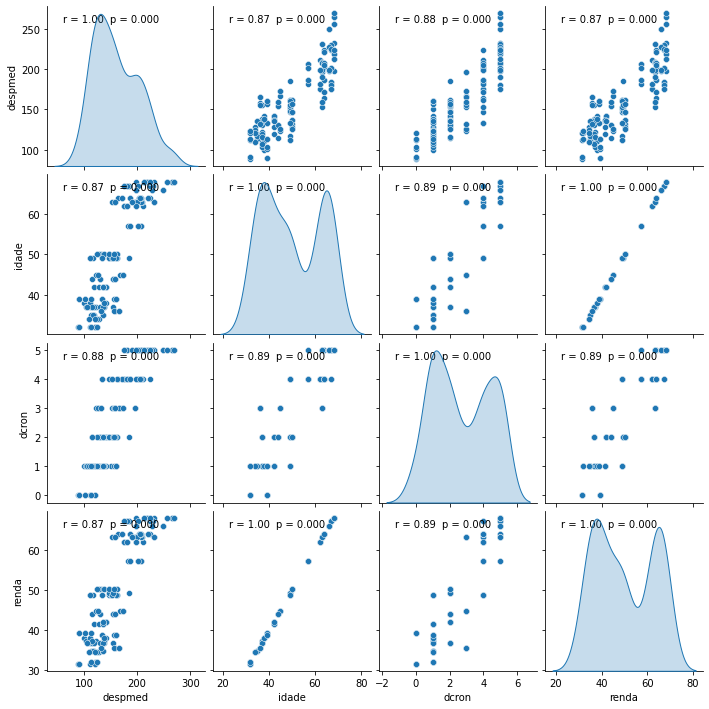

In [8]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_planosaude.loc[:,"despmed":"renda"], diag_kind="kde")
graph.map(corrfunc)
plt.show()

## Dummizando a variável 'plano'

In [9]:
df_planosaude_dummies = pd.get_dummies(df_planosaude, columns=['plano'],
                                      drop_first=True)

df_planosaude_dummies.head(10)

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro
0,1,206.84,57,5,57.200001,0,0
1,2,184.19,67,4,67.199997,0,0
2,3,175.68,62,4,62.000000,0,0
3,4,180.04,67,5,67.199997,0,0
4,5,218.86,68,5,68.000000,0,0
5,6,208.11,63,5,63.200001,0,0
6,7,220.94,64,5,64.000000,0,0
7,8,249.35,66,5,66.000000,0,0
8,9,264.93,68,5,68.000000,0,0
9,10,196.22,63,3,63.200001,0,0


### Estimação do modelo de regressão múltipla com n-1 dummies


Definição da fórmula utilizada no modelo

In [10]:
lista_colunas = list(df_planosaude_dummies.drop(columns=['id',
                                                         'despmed']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "despmed ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

modelo_planosaude = sm.OLS.from_formula(formula_dummies_modelo,
                                        df_planosaude_dummies).fit()

Fórmula utilizada:  despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro


Parâmetros do modelo

In [11]:
modelo_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                despmed   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     262.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.88e-84
Time:                        23:56:10   Log-Likelihood:                -828.04
No. Observations:                 200   AIC:                             1668.
Df Residuals:                     194   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.8596     12.744     11.681      0.000     123.725     173.994
idade               8.9226      5.549      1.608      0.109      -2.021      19.866
dcron               6.7232      1.600      4.201      0.000       3.567       9.879
renda              -8.4425      5.464     -1.545      0.124     -19.219       2.334
plano_esmeralda   -35.0189      4.685     -7.474      0.000     -44.259     -25.779
plano_ouro        -58.7653      6.075     -9.673      0.000     -70.747     -46.783
==============================================================================
Omnibus:                       25.070   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.329
Skew:                           0.622   Prob(JB):                     3.20e-11
Kurtosis:                       5.062   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Aplicação do procedimento Stepwise

Na estatística, a regressão por stepwise é um técnica de ajuste de modelos de regressão em que a escolha das variáveis preditivas é realizada por um procedimento automático.[1][2][3][4] Em cada etapa, uma variável é considerada para adição ou subtração do conjunto de variáveis explicativas com base em algum critério pré-especificado. Normalmente, se assume a forma de uma sequência de testes ou t, mas outras técnicas são possíveis, como R 2 ajustado, critério de informação de Akaike, critério de informação Bayesiano, Mallows, PRESS ou taxa de descoberta falsa.

Na prática frequente de ajuste do modelo final selecionado seguido de relatórios de estimativas e intervalos de confiança sem ajustá-los para levar em conta o processo de construção de modelo levou a pedidos para parar de usar a construção de modelo passo a passo[5][6] ou pelo menos ter certeza de a incerteza do modelo é refletida corretament

In [ ]:
!pip install "stepwise-process==2.5"

In [13]:
from stepwise_process.statsmodels import stepwise
modelo_step_planosaude = stepwise(modelo_planosaude, pvalue_limit=0.05)


Regression type: OLS 

Estimating model...: 
 despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.12394651280125517 

Estimating model...: 
 despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.11501748716135901 

Estimating model...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.12394651280125517}
{'atribute': 'idade', 'p-value': 0.11501748716135901}

 Model after stepwise process...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:                despmed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                   

Na aplicação do procedimento, note que se retirarmos a variável endividamento , o 𝛽 do disclosure não passa no teste de 
significância. Neste exemplo, como resultado sobraram somente 𝛽 de ativos e 𝛽 liquidez como sendo significantes. 


##Teste de verificação da aderência dos resíduos à normalidade

Teste aplicado para validação do modelo caso os termos de erros sejam aderentes a normalidade, é necessário considerar a utilização de modelos não linerares 

In [ ]:
!pip install "sfrancia==1.0.8"

In [15]:
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_planosaude.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9429167651264182,
 'statistics z': 4.609587272596199,
 'p-value': 2.017345699616836e-06}

Considerando um nivel de significância de 95%, em termo estatistico os residuos não tem aderência a normalidade 

Plotando os resíduos do 'modelo_step_planosaude',
com curva normal teórica

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


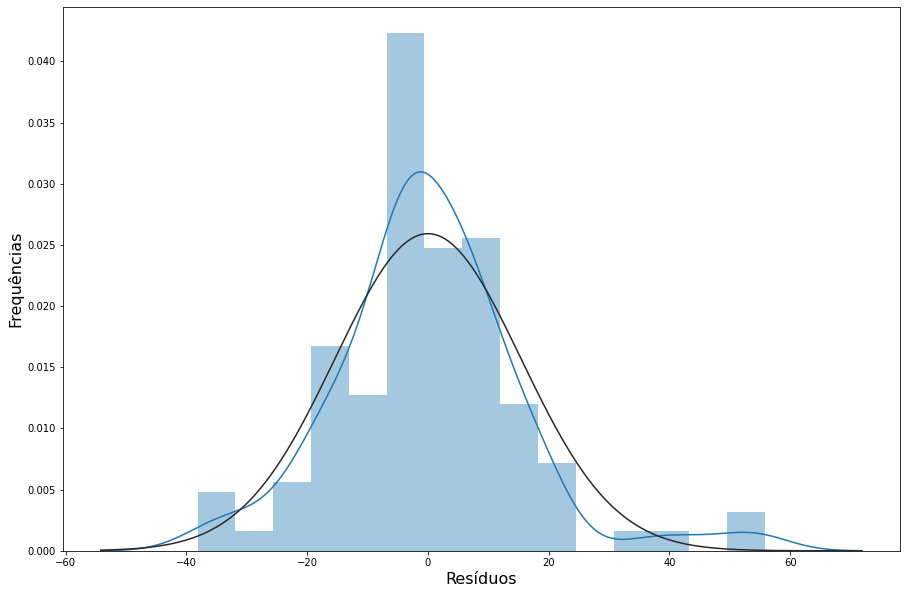

In [16]:
from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_planosaude.resid, fit=norm, kde=True, bins=15)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

Kernel density estimation (KDE) - forma não-paramétrica para estimar
a função densidade de probabilidade de uma variável aleatória

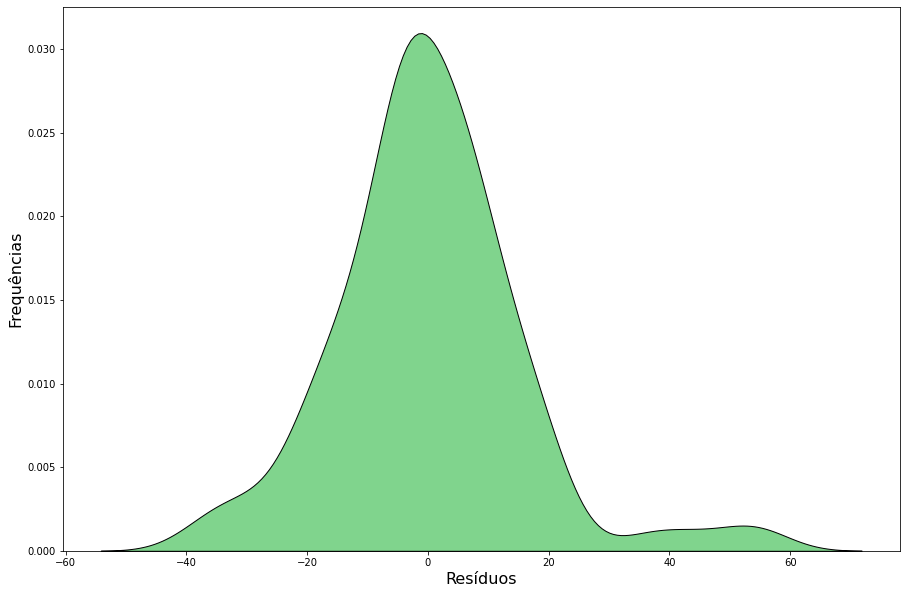

In [17]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_step_planosaude.resid, multiple="stack",
            color='#55C667FF')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

 Função para o teste de Breusch-Pagan para a elaboração de diagnóstico de heterocedasticidade

In [21]:
from scipy import stats
def breusch_pagan_test(modelo):# Criação da função 'breusch_pagan_test'

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

###Teste de Breusch-Pagan


In [22]:
breusch_pagan_test(modelo_step_planosaude)

chisq: 60.80182494235374
p-value: 6.412586303736205e-15


(60.80182494235374, 6.412586303736205e-15)

Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)relevante(s)

*   H0 do teste: ausência de heterocedasticidade.
*   H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

Adicionando fitted values e resíduos do 'modelo_step_planosaude'
no dataset 'df_planosaude_dummies'

In [23]:
df_planosaude_dummies['fitted_step'] = modelo_step_planosaude.fittedvalues
df_planosaude_dummies['residuos_step'] = modelo_step_planosaude.resid
df_planosaude_dummies


,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515
...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648


Gráfico que relaciona resíduos e fitted values
do 'modelo_step_planosaude'

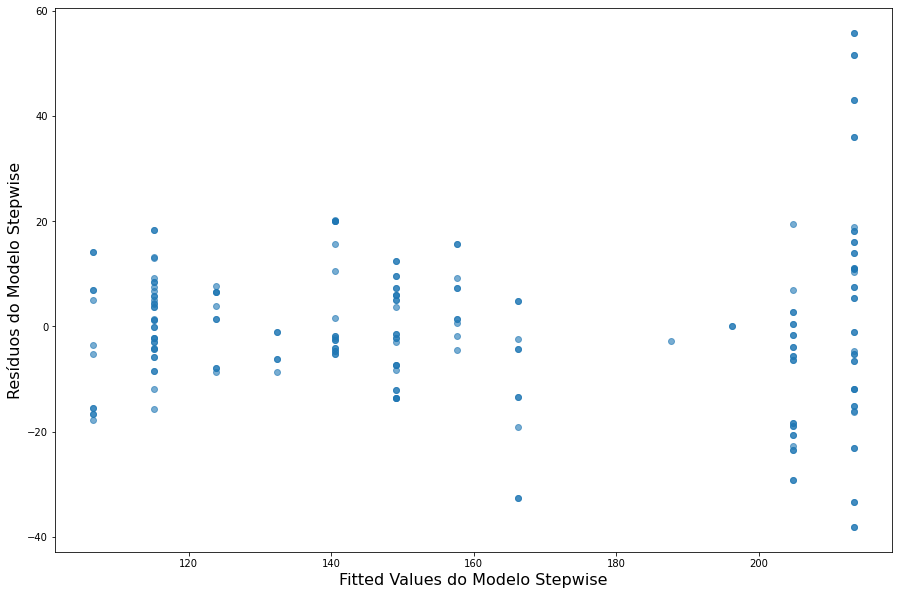

In [24]:
xdata = df_planosaude_dummies['fitted_step']
ydata = df_planosaude_dummies['residuos_step']

plt.figure(figsize=(15,10))
plt.scatter(xdata, ydata, alpha=0.6)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=16)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=16)
plt.show()

##Transformação de Box-Cox

Em estatística, uma transformação de potência é uma família de funções que são aplicadas para criar a transformação monotônica de dados usando funções de potência. Esta é uma técnica de transformação de dados útil usada para estabilizar a variância, tornar os dados mais semelhantes à distribuição normal, melhorar a validade das medidas de associação (como a correlação de Pearson entre as variáveis) e para outros procedimentos de estabilização de dados.

In [26]:
from scipy.stats import boxcox

#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df_planosaude_dummies['despmed'])

print("Primeiros valores: ",x[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [3.718813   3.66464869 3.64229506 3.65389877 3.74486701]
Lambda:  -0.14436741694478952


Inserindo o lambda de Box-Cox no dataset para a estimação de um novo modelo


In [27]:
df_planosaude_dummies['bc_despmed'] = x
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step,bc_despmed
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485,3.718813
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144,3.664649
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144,3.642295
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485,3.653899
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515,3.744867
...,...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307,3.594710
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856,3.715463
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034,3.510008
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648,3.593832


## Estimando um novo modelo múltiplo

Com variável dependente transformada por Box-Cox e sem retirar nenhuma variável dependente

In [29]:
modelo_bc_planosaude = sm.OLS.from_formula('bc_despmed ~ idade + dcron +\
                                           renda + plano_esmeralda +\
                                               plano_ouro',
                                               df_planosaude_dummies).fit()

#Parâmetros do modelo
modelo_bc_planosaude.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_despmed   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.80e-92
Time:                        00:11:06   Log-Likelihood:                 355.33
No. Observations:                 200   AIC:                            -698.7
Df Residuals:                     194   BIC:                            -678.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5507      0.034    103.431      0.000       3.483       3.618
idade               0.0146      0.015      0.980      0.328      -0.015       0.044
dcron               0.0231      0.004      5.360      0.000       0.015       0.032
renda              -0.0136      0.015     -0.924      0.357      -0.043       0.015
plano_esmeralda    -0.0820      0.013     -6.494      0.000      -0.107      -0.057
plano_ouro         -0.1791      0.016    -10.944      0.000      -0.211      -0.147
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.871
Skew:                          -0.246   Prob(JB):                        0.238
Kurtosis:                       3.319   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Novamente o renda e idade apresentou não ter significancia estatística, será aplicado novamente o método step wise.

In [30]:
modelo_step_bc_planosaude = stepwise(modelo_bc_planosaude, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.35652506193898914 

Estimating model...: 
 bc_despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.16481169113208033 

Estimating model...: 
 bc_despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.35652506193898914}
{'atribute': 'idade', 'p-value': 0.16481169113208033}

 Model after stepwise process...: 
 bc_despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:             bc_despmed   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:       

Note que a variável 'disclosure' acaba voltando ao modelo
na forma funcional não linear!


## Verificando a normalidade dos resíduos do 'modelo_step_empresas_bc'

In [31]:
shapiroFrancia(modelo_step_bc_planosaude.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9868895949417088,
 'statistics z': 1.5678174790534372,
 'p-value': 0.058461867248408454}

Plotando os novos resíduos do 'modelo_step_empresas_bc'

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


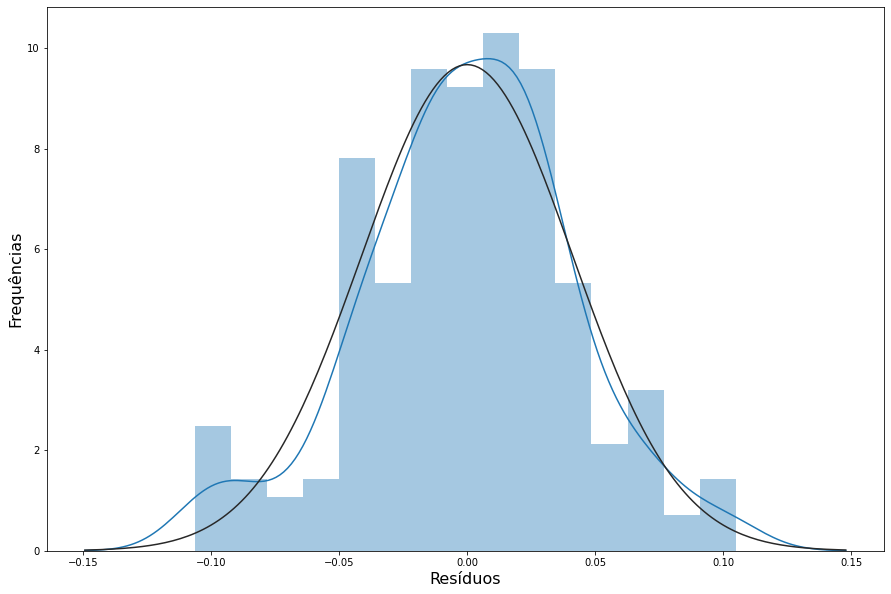

In [32]:
from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_bc_planosaude.resid, fit=norm, kde=True, bins=15)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

Kernel density estimation (KDE)

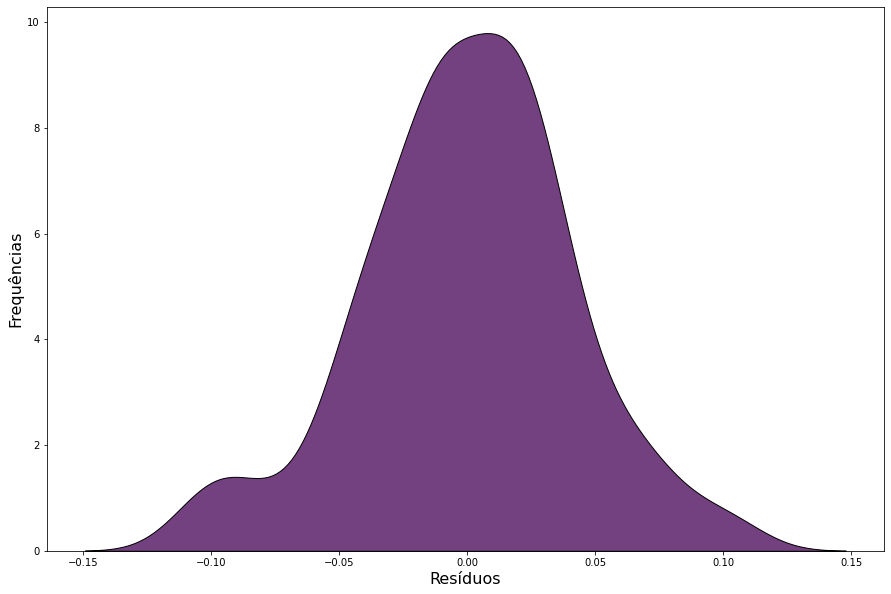

In [33]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_step_bc_planosaude.resid, multiple="stack",
            color='#440154FF')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()


Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
no 'modelo_step_bc_planosaude'

In [34]:
breusch_pagan_test(modelo_step_bc_planosaude)

chisq: 1.0126281112242304
p-value: 0.47788750037446837


(1.0126281112242304, 0.47788750037446837)

Adicionando fitted values e resíduos do 'modelo_step_bc_planosaude'
no dataset 'df_planosaude_dummies'

In [35]:
df_planosaude_dummies['fitted_step_bc'] = modelo_step_bc_planosaude.fittedvalues
df_planosaude_dummies['residuos_step_bc'] = modelo_step_bc_planosaude.resid
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step,bc_despmed,fitted_step_bc,residuos_step_bc
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485,3.718813,3.733710,-0.014897
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144,3.664649,3.706620,-0.041972
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144,3.642295,3.706620,-0.064325
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485,3.653899,3.733710,-0.079812
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515,3.744867,3.733710,0.011157
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307,3.594710,3.589191,0.005519
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856,3.715463,3.706620,0.008843
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034,3.510008,3.616281,-0.106274
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648,3.593832,3.562101,0.031730


Gráfico que relaciona resíduos e fitted values
do 'modelo_step_bc_planosaude'

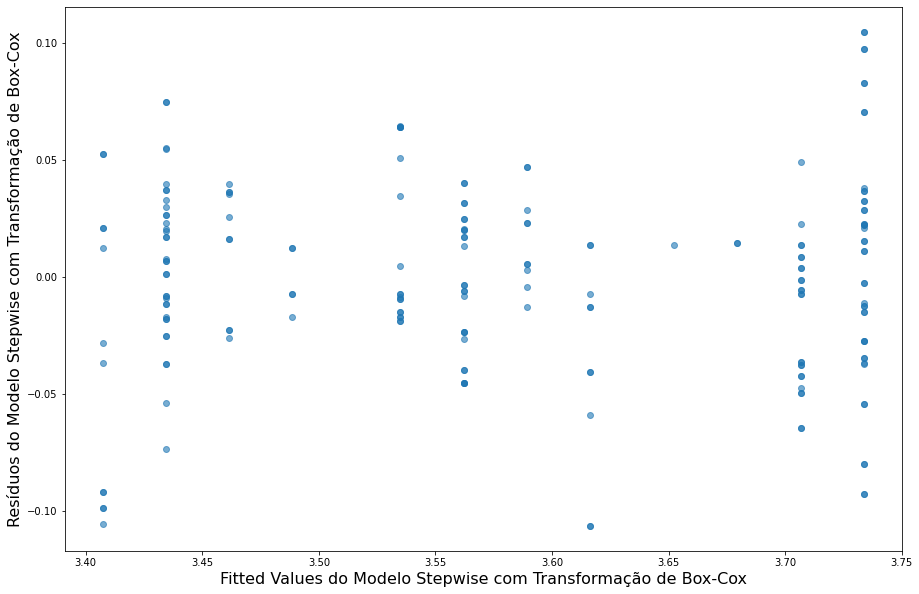

In [36]:
xdata = df_planosaude_dummies['fitted_step_bc']
ydata = df_planosaude_dummies['residuos_step_bc']

plt.figure(figsize=(15,10))
plt.scatter(xdata, ydata, alpha=0.6)
plt.xlabel('Fitted Values do Modelo Stepwise com Transformação de Box-Cox',
           fontsize=16)
plt.ylabel('Resíduos do Modelo Stepwise com Transformação de Box-Cox',
           fontsize=16)
plt.show()